# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqrob = lambda chisq, df:stats.chi2.sf(chisq,df)

## Load the data

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
# raw_data

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


##  Declare the dependent and independent variables

In [4]:
#x1 is independent variable
#y is dependent variable
y = data['Admitted']
x1 = data['SAT']   

## Let's plot the data 

### Scatter plot

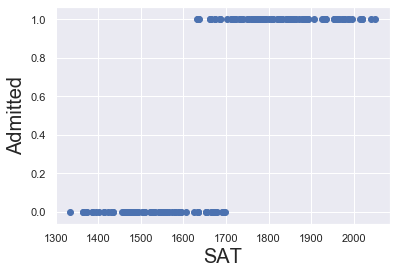

In [5]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line try

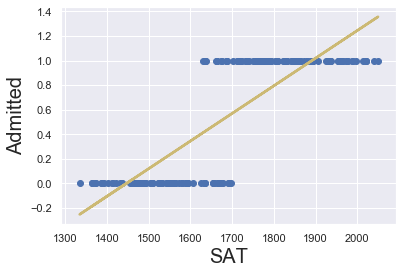

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw = 2.5, color = 'C8')

plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize =20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


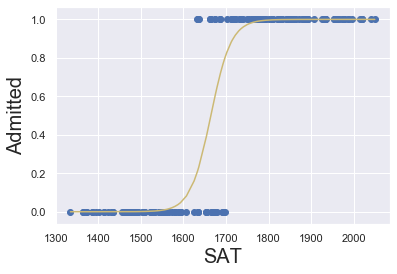

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

# f_notsorted = np.array(f(x1,results_log.params[0], results_log.params[1]))
# x_notsorted = np.array(x1)
# results_log.params[0], results_log.params[1]
f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize =20)
plt.ylabel('Admitted',fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

# Summary

In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                  0.7992
Time:                        13:21:28   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [9]:
x0 = np.ones(168)
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:               7.410e-11
Time:                        13:21:28   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""